<a href="https://colab.research.google.com/github/HeydarAbdurahmanov/Fashion_MNIST_Classification_Using_Neural_Network/blob/main/Fashion_MNIST_Classification_Using__Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist


In [2]:
# Loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

let’s have a quick look at one of the samples of the images from the dataset:

Image Label : 5


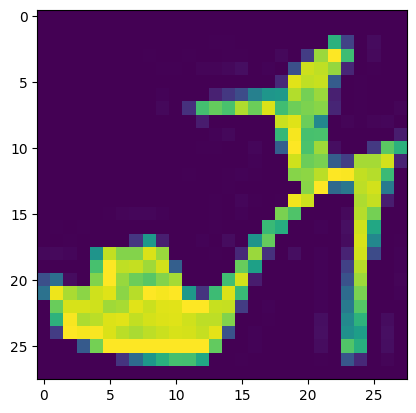

In [3]:
imgIndex = 9
image = train_images[imgIndex]
print("Image Label :",train_labels[imgIndex])
plt.imshow(image)

Looking at the shape of both the training and test data:

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Building a neural network architecture with two hidden layers:

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Before training the model,splitting the training data into training and validation sets:

In [6]:
xvalid, xtrain = train_images[:5000]/255.0, train_images[5000:]/255.0
yvalid, ytrain = train_labels[:5000], train_labels[5000:]

 Training a neural network for the task of image classification:

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 15s 7ms/step - loss: 0.4854 - accuracy: 0.8267 - val_loss: 0.4242 - val_accuracy: 0.8430
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3667 - accuracy: 0.8650 - val_loss: 0.3427 - val_accuracy: 0.8736
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3282 - accuracy: 0.8805 - val_loss: 0.3276 - val_accuracy: 0.8800
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3073 - accuracy: 0.8861 - val_loss: 0.3061 - val_accuracy: 0.8898
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2866 - accuracy: 0.8934 - val_loss: 0.3142 - val_accuracy: 0.8834
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.8984 - val_loss: 0.3048 - val_accuracy: 0.8902
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2603 - accuracy: 0.9019 - val_loss: 0.3060 - val_accuracy

 Looking at the predictions:

In [8]:
new = test_images[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 82ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Looking at the predicted classes:

In [9]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]


1/1 [==============================] - 0s 21ms/step


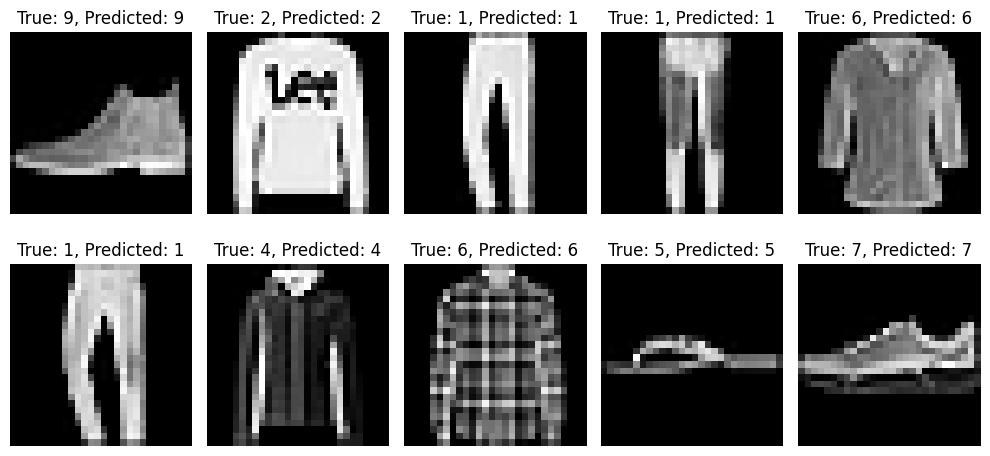

In [10]:
# Visualizing some sample predictions
num_samples = 10
sample_images = test_images[:num_samples]
sample_labels = test_labels[:num_samples]
predictions = model.predict(sample_images)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Predicted: {tf.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()